In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

# Load and visualize an example graph

We will use Zachary's Karate Club, a social network showing the interactions between members outside of the club.

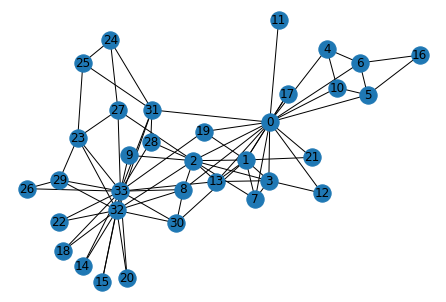

In [ ]:
# Load the graph
G_karate = nx.karate_club_graph()
# Define position of each node
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

# Question: What kind of graph is G_karate?

# General info from a graph

In [ ]:
print(nx.info(G_karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


Let's look at the nodes and edges in the network. The node names here are numbers (0, 1, 2, ...). To manipulate them array with node names and edge names, we need to convert to a python list.

In [ ]:
#G_karate.nodes() is a networkx object, we can convert it to a normal python list to manipulate it
#G_karate.edges() is a networkx object, we can convert it to a normal python list to manipulate it
karate_nodes =  list(G_karate.nodes())
karate_edges =  list(G_karate.edges())

print("Nodes",karate_nodes)
print("Edges",karate_edges)

Nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


# Adjacent nodes (neighbors) and Degree

We can get neighbors of each node.

In [ ]:
neighbors_node0=list(G_karate.neighbors(0))
neighbors_node1=list(G_karate.neighbors(1))
neighbors_node5=list(G_karate.neighbors(5))
print("neighbors node 0",neighbors_node0)
print("neighbors node 1",neighbors_node1)
print("neighbors node 5",neighbors_node5)

neighbors node 0 [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]
neighbors node 1 [0, 2, 3, 7, 13, 17, 19, 21, 30]
neighbors node 5 [0, 6, 10, 16]


In [ ]:
# The nx.degree function outputs the degree of each node in the network
nx.degree(G_karate)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(G_karate.degree, key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node)
print(degree)

(33, 0, 32, 2, 1, 3, 31, 8, 13, 23, 5, 6, 7, 27, 29, 30, 4, 10, 19, 24, 25, 28, 9, 12, 14, 15, 16, 17, 18, 20, 21, 22, 26, 11)
(17, 16, 12, 10, 9, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1)


<BarContainer object of 34 artists>

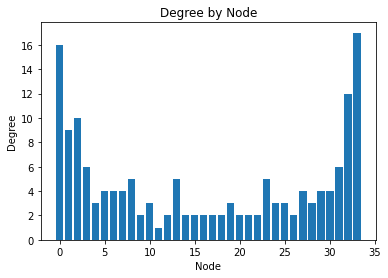

In [ ]:
# Plot the degree of each node
ax = plt.subplot(111)
ax.set_title('Degree by Node')
ax.set_xlabel('Node')
ax.set_ylabel('Degree')
ax.bar(node,degree)

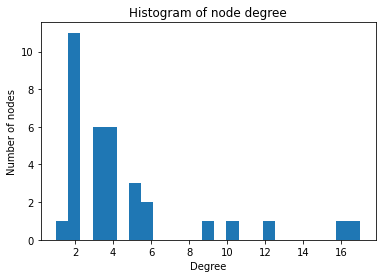

In [ ]:
plt.hist(degree,bins=25)
plt.title('Histogram of node degree')
plt.ylabel('Number of nodes')
plt.xlabel('Degree')
plt.show()